### K-Means From Scratch

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
import scipy

In [4]:
df = pd.read_csv('E_cluster_validation_data.txt', sep=",", header=None)

In [5]:
df.head()

,0,1
0,2.510076,2.159303
1,3.739776,0.974175
2,-0.142930,2.960866
3,2.817929,2.268013
4,2.302407,2.119619


In [6]:
df.shape

(600, 2)

Text(0.5, 0, 'Index')

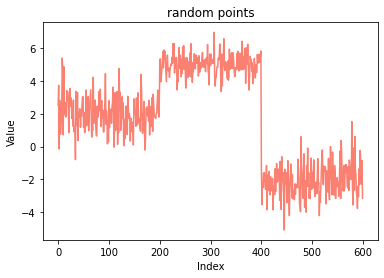

In [11]:
plt.plot(df.index, df[0], c='salmon')
plt.title('random points')
plt.ylabel('Value')
plt.xlabel('Index')

Text(0.5, 0, 'Index')

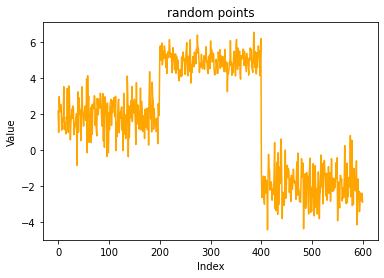

In [12]:
plt.plot(df.index, df[1], c='orange')
plt.title('random points')
plt.ylabel('Value')
plt.xlabel('Index')

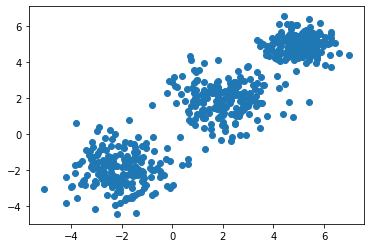

In [13]:
plt.scatter(df[0],df[1])

### Normalise Data

In [15]:
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [17]:
def kmeans(X,k=3,max_iterations=100):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [18]:
P = kmeans(X)

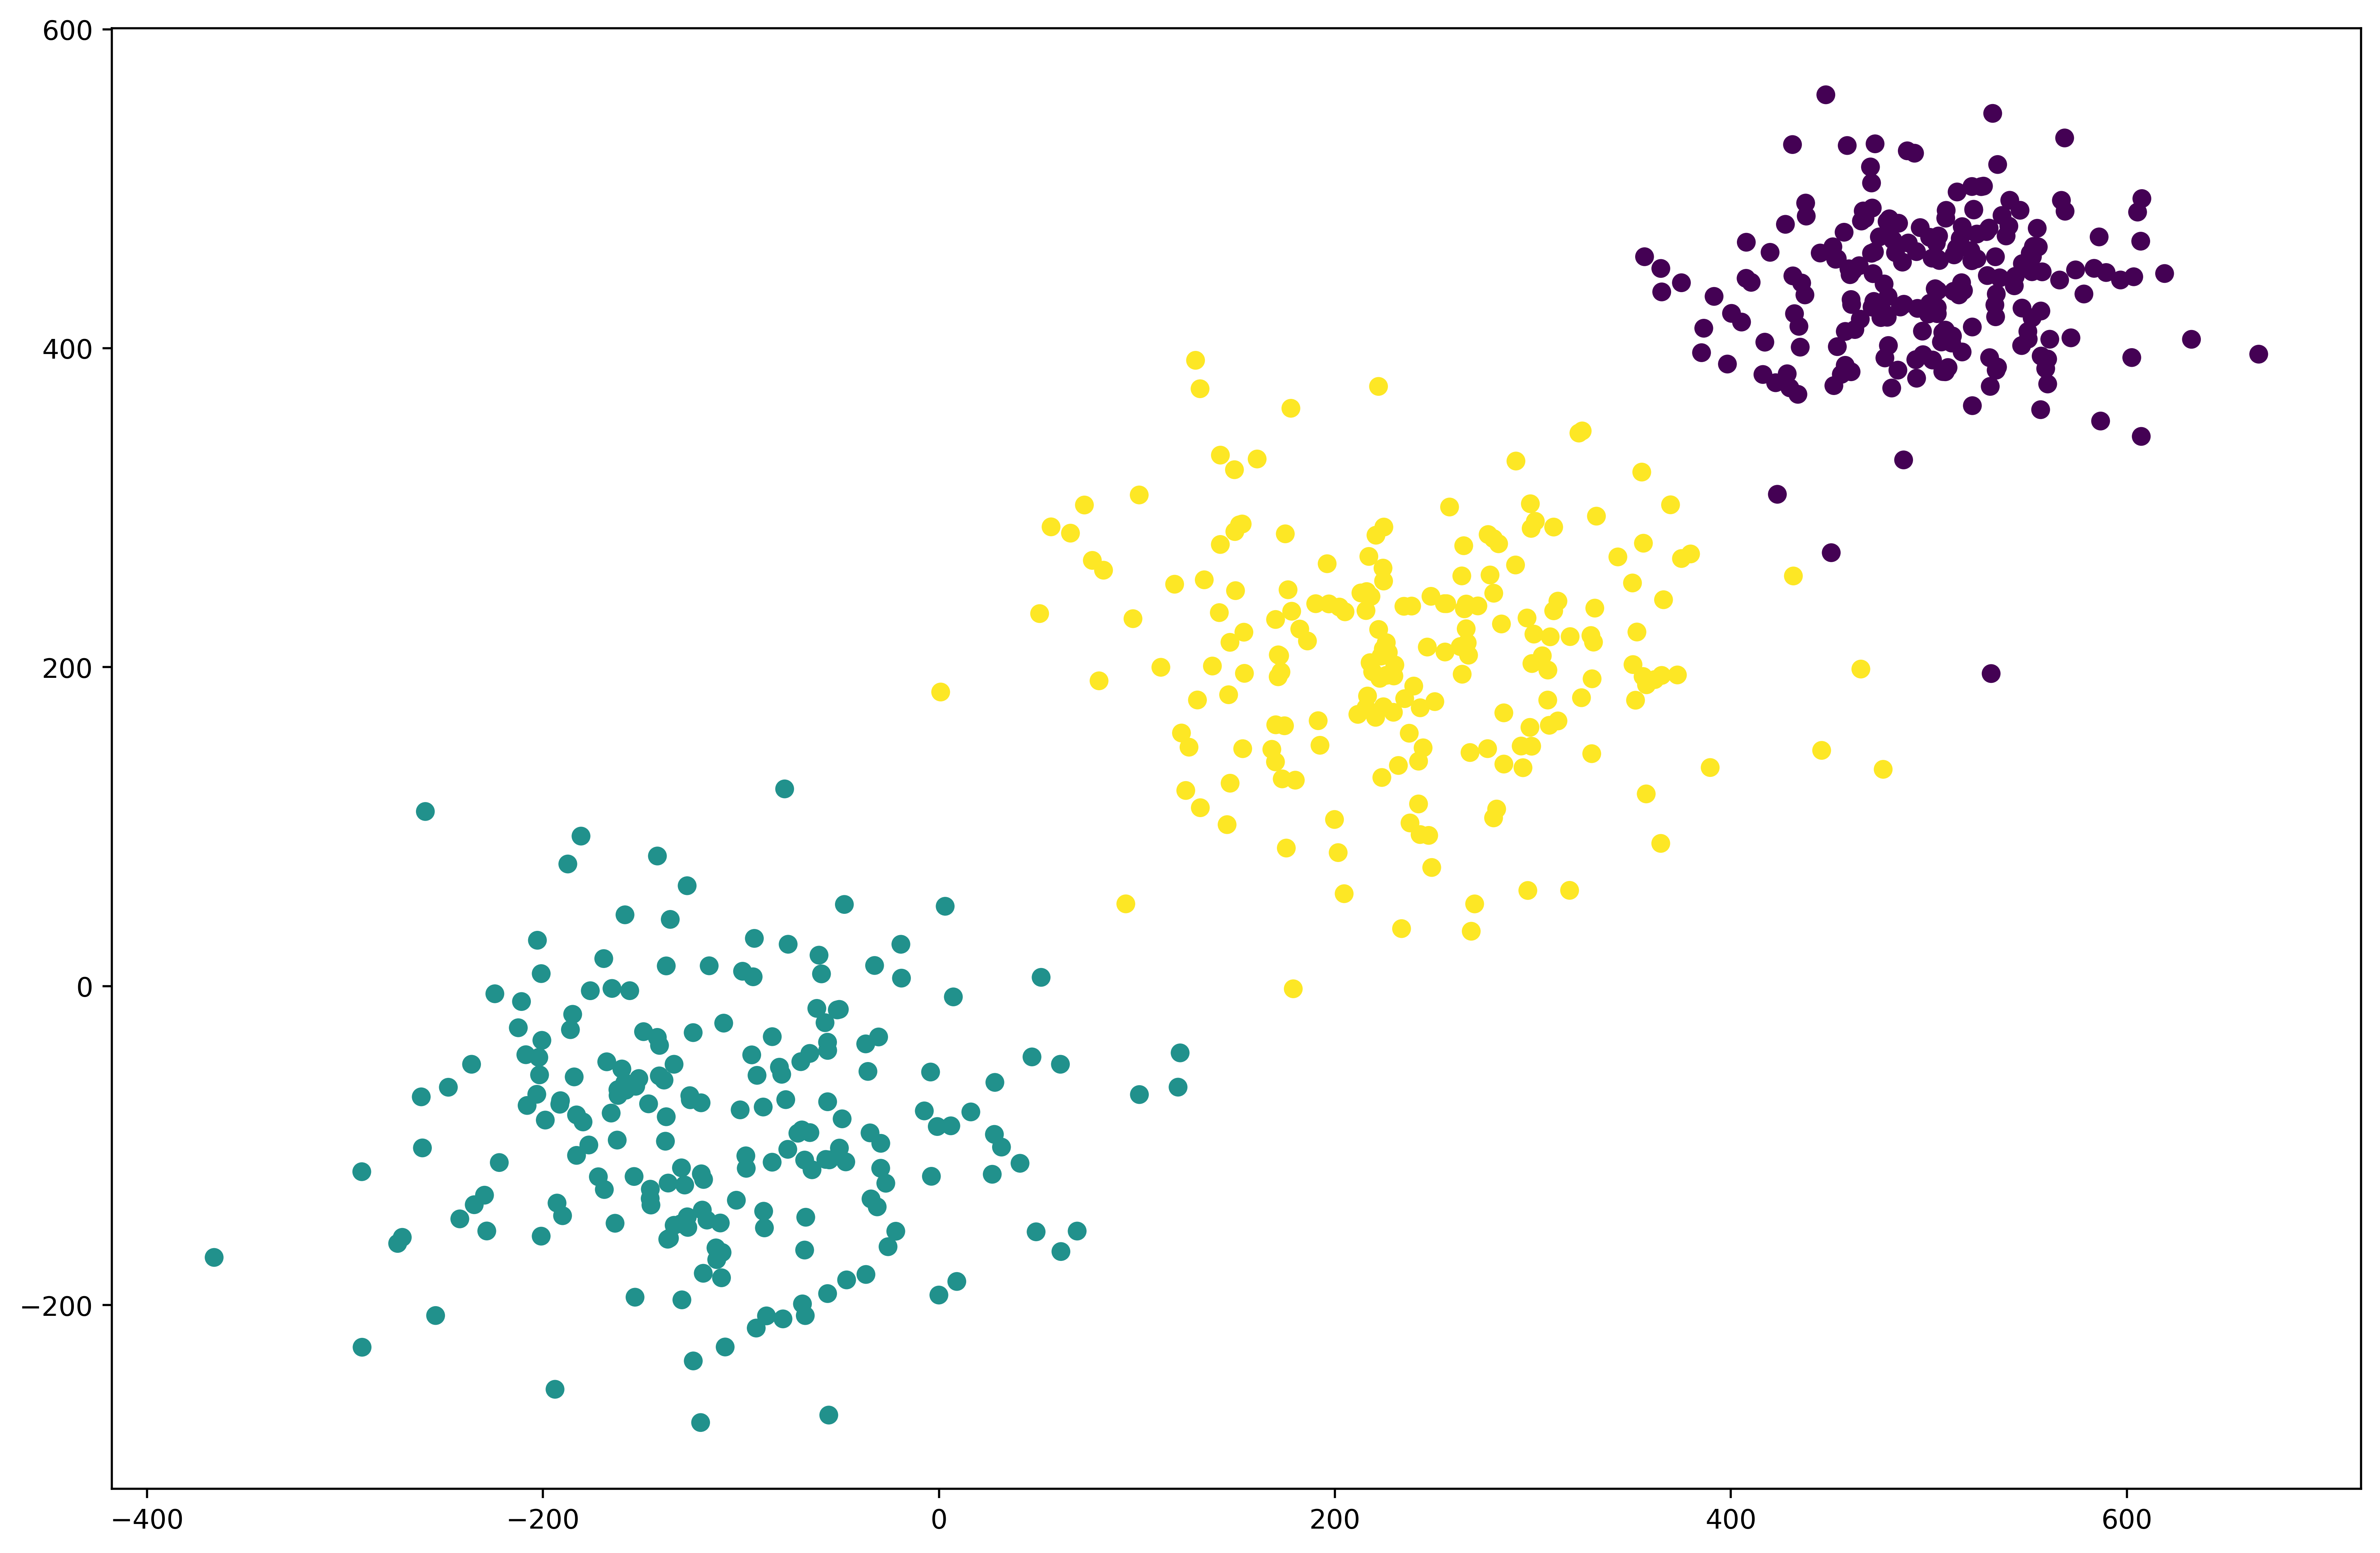

In [23]:
X = sc.inverse_transform(X)
plt.figure(figsize=(15,10), dpi=500)
plt.scatter(X[:,0], X[:,1], c=P)
plt.show()

### K-Means Validation

In [24]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

### Elbow Method

<function matplotlib.pyplot.show(*args, **kw)>

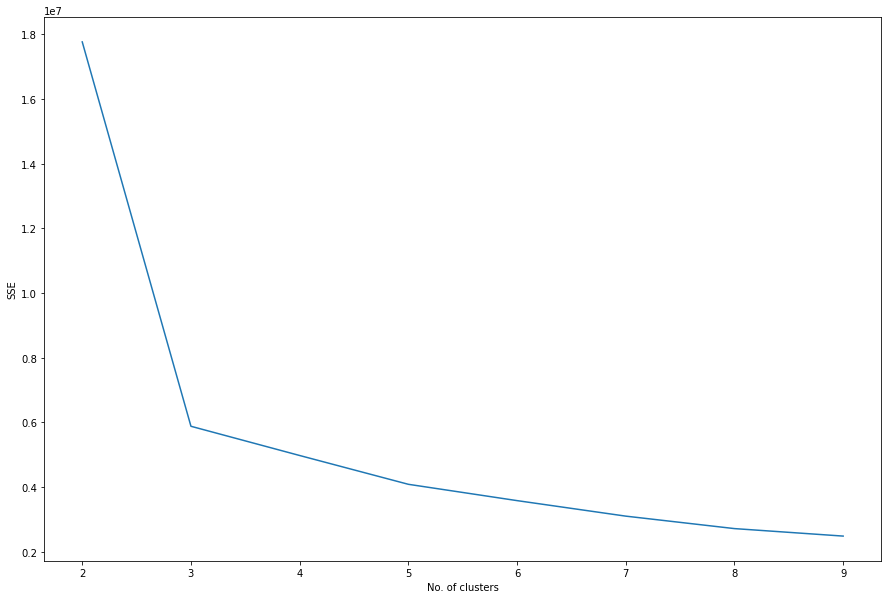

In [34]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show

In [29]:
#find elbow programmatically
!pip install kneed

In [30]:
from kneed import *

In [35]:
kl = KneeLocator(range(2,10), list(sse.values()), curve='convex', direction="decreasing")

In [36]:
kl.elbow

3

### Davies-Bouldin Index

<function matplotlib.pyplot.show(*args, **kw)>

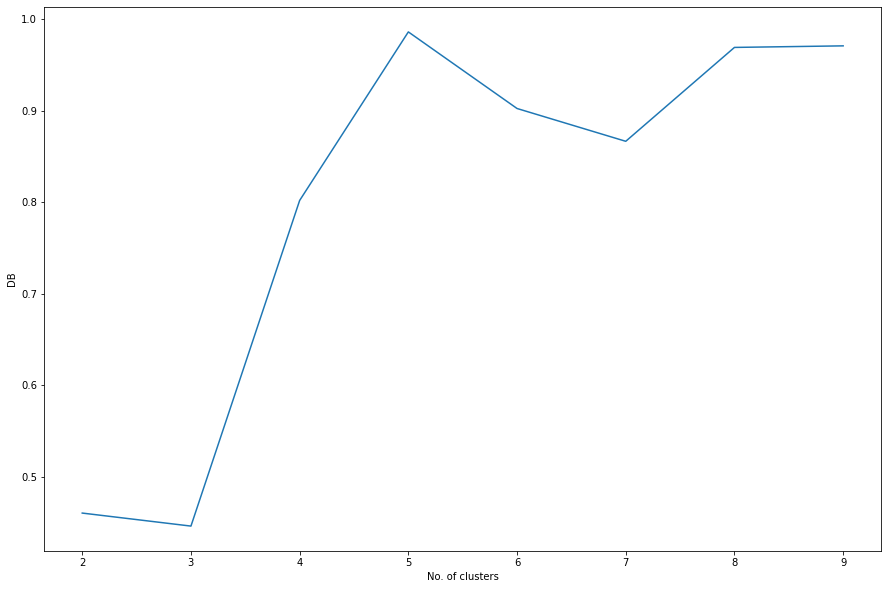

In [37]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel('No. of clusters')
plt.ylabel('DB')
plt.show

In [44]:
#Minimum value means it is the best cluster
print(list(db.keys())[list(db.values()).index(min(db.values()))])

3


### Silhouette Analysis

<function matplotlib.pyplot.show(*args, **kw)>

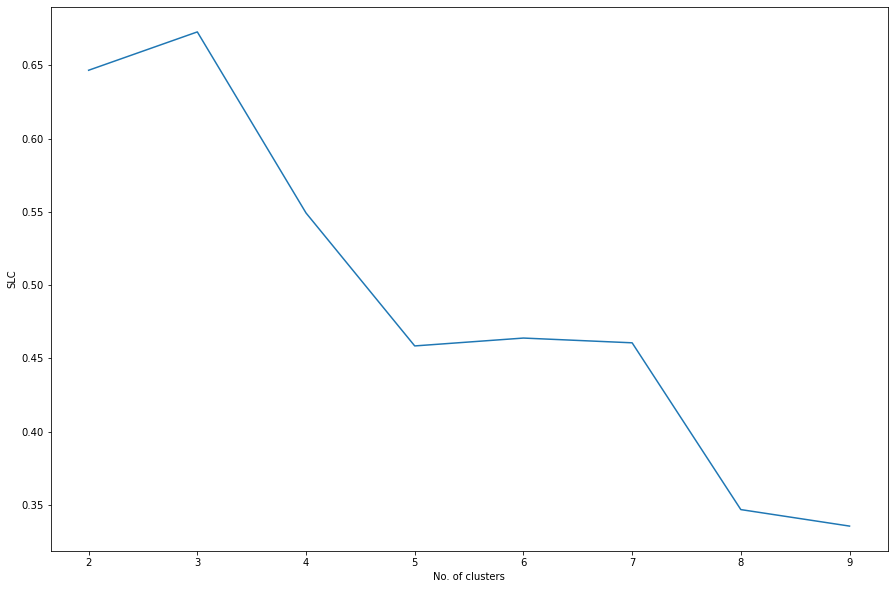

In [45]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel('No. of clusters')
plt.ylabel('SLC')
plt.show

In [46]:
#Max value means best cluster
print(list(slc.keys())[list(slc.values()).index(max(slc.values()))])

3


For n_clusters = 2 The average silhouette_score is : 0.646746989240261
For n_clusters = 3 The average silhouette_score is : 0.6729317566498482
For n_clusters = 4 The average silhouette_score is : 0.5493056192861261
For n_clusters = 5 The average silhouette_score is : 0.45852629754428714
For n_clusters = 6 The average silhouette_score is : 0.46389849481604367
For n_clusters = 7 The average silhouette_score is : 0.4606561109072201
For n_clusters = 8 The average silhouette_score is : 0.3467813292002419
For n_clusters = 9 The average silhouette_score is : 0.3355148061394449


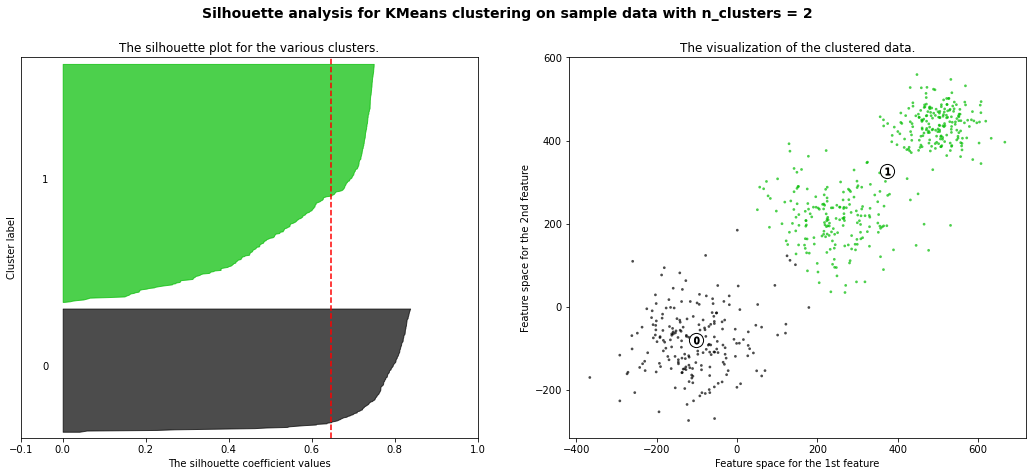

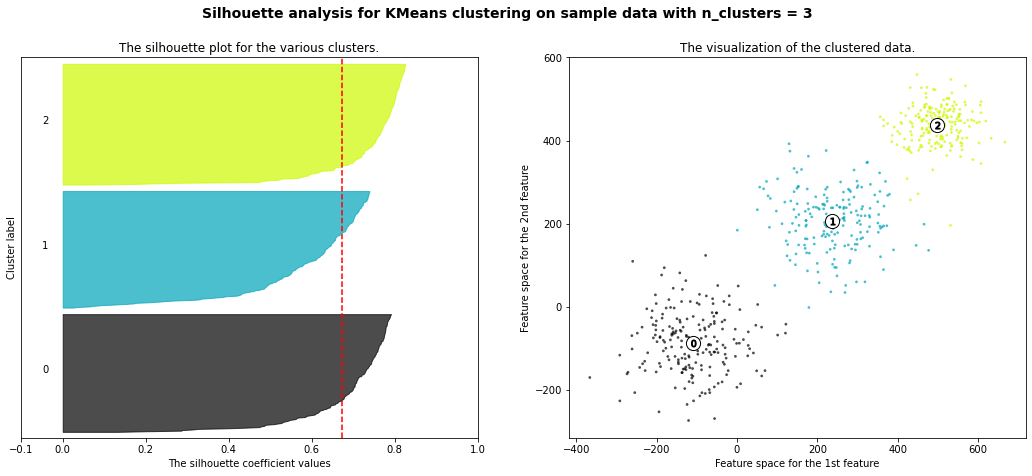

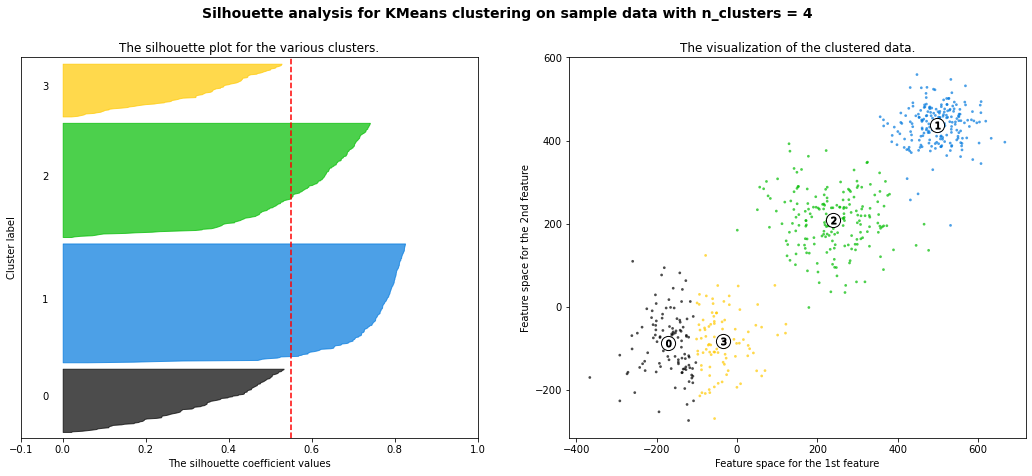

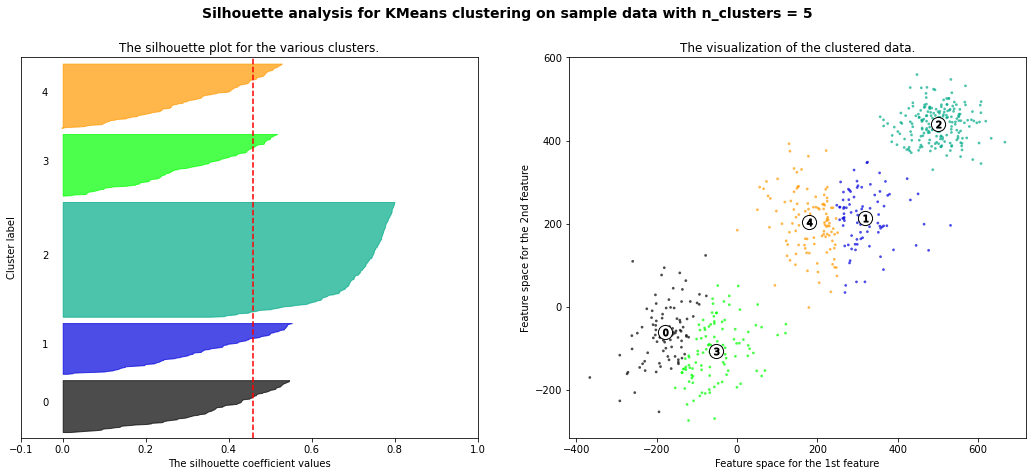

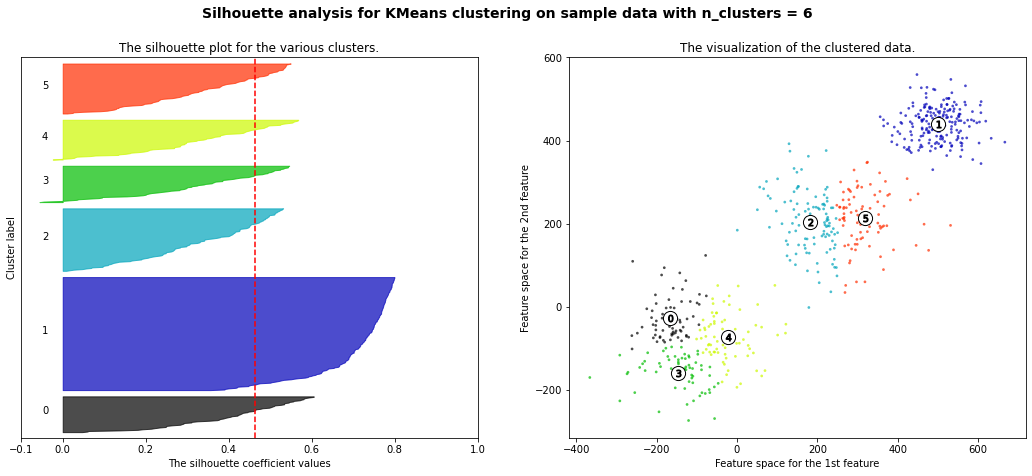

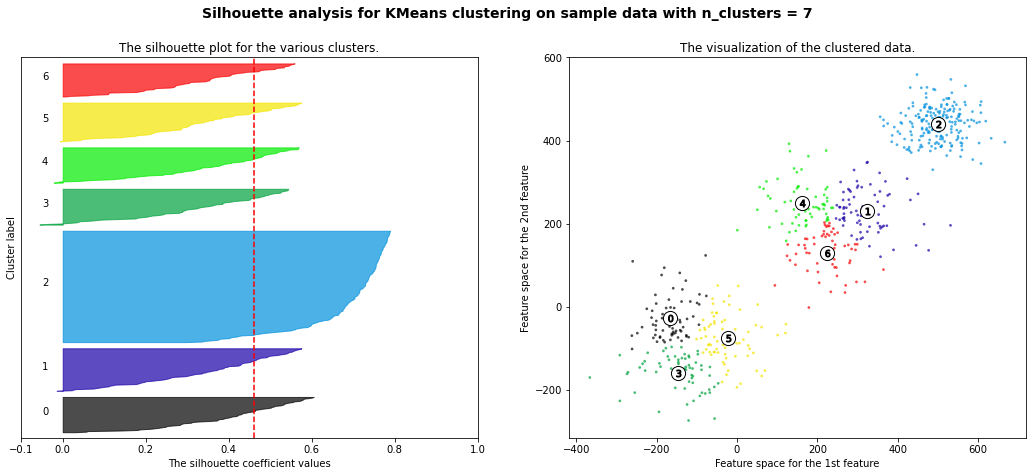

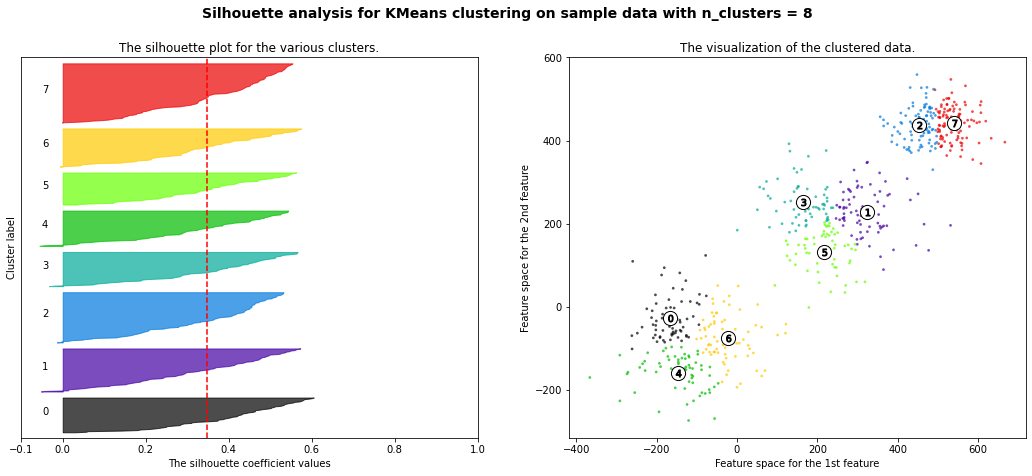

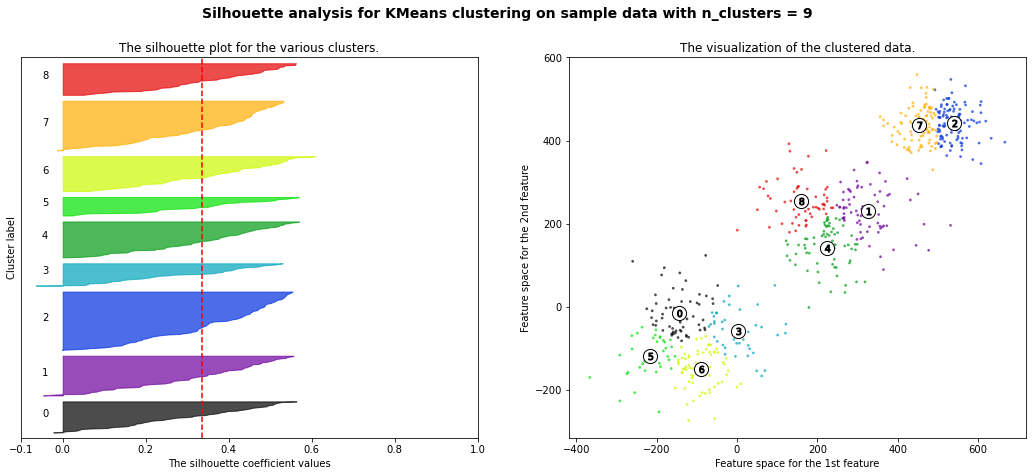

In [47]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Red line is average sihoutte score
#A good cluster is all of them are on or over the red line
